In [23]:
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("/home/user/veridia.io/archive/Resume/resume_cleaned.csv")
print(df.columns)


Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'text_length',
       'word_count', 'has_special_chars', 'has_numbers', 'has_uppercase'],
      dtype='object')


In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:

def clean_resume_text(text):
    """Basic cleaning: remove URLs, numbers, punctuation, etc."""
    if pd.isna(text):
        return ""
    
    text = str(text).lower()  
    
    
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'\[[^]]*\]', '', text)

    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)

    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

df['cleaned_text'] = df['Resume_str'].apply(clean_resume_text)    


In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def advanced_text_cleaning(text):
    """Advanced cleaning: tokenization, stopword removal, lemmatization"""
    text = clean_resume_text(text)
    tokens = word_tokenize(text)
    
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    

    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return ' '.join(tokens)

df['advanced_cleaned_text'] = df['Resume_str'].apply(advanced_text_cleaning)


🔍 Text Length Comparison:
Original avg length: 6298.71
Basic cleaned avg length: 5555.22
Advanced cleaned avg length: 4711.37

Original avg word count: 811.77
Basic cleaned avg word count: 773.93
Advanced cleaned avg word count: 573.02

Empty texts after cleaning → Basic: 0, Advanced: 0


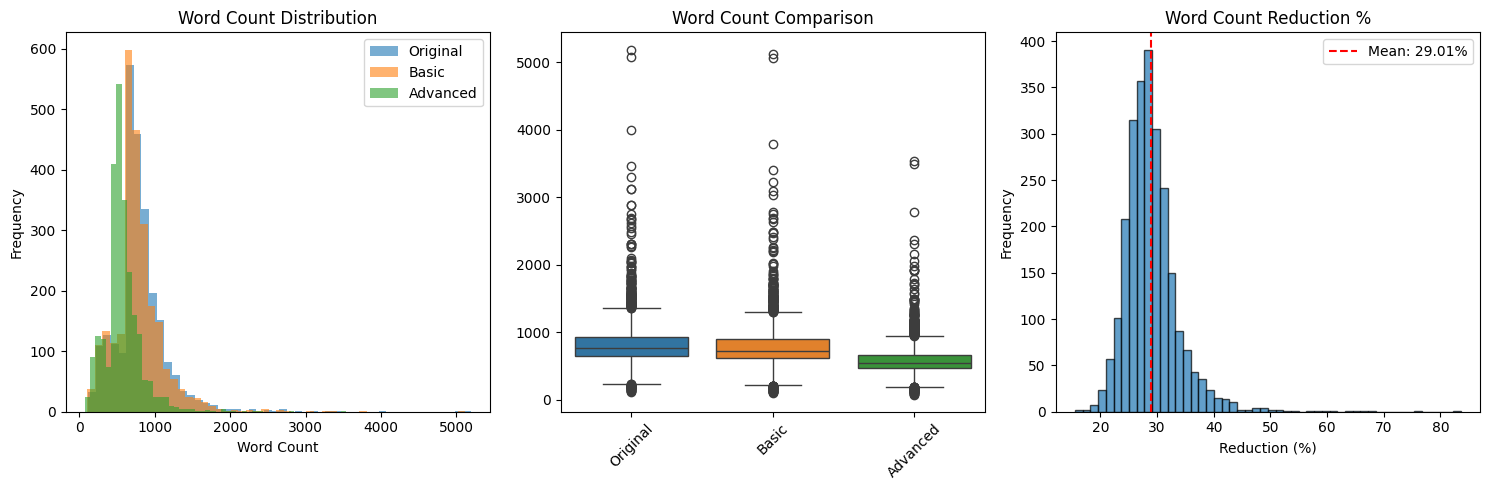


📉 Average word count reduction: 29.01%

✅ Cleaning completed and saved as 'resume_cleaned.csv'


In [24]:

df['original_length'] = df['Resume_str'].str.len()
df['cleaned_length'] = df['cleaned_text'].str.len()
df['advanced_cleaned_length'] = df['advanced_cleaned_text'].str.len()
df['original_word_count'] = df['Resume_str'].str.split().str.len()
df['cleaned_word_count'] = df['cleaned_text'].str.split().str.len()
df['advanced_cleaned_word_count'] = df['advanced_cleaned_text'].str.split().str.len()

print("\n🔍 Text Length Comparison:")
print(f"Original avg length: {df['original_length'].mean():.2f}")
print(f"Basic cleaned avg length: {df['cleaned_length'].mean():.2f}")
print(f"Advanced cleaned avg length: {df['advanced_cleaned_length'].mean():.2f}")

print(f"\nOriginal avg word count: {df['original_word_count'].mean():.2f}")
print(f"Basic cleaned avg word count: {df['cleaned_word_count'].mean():.2f}")
print(f"Advanced cleaned avg word count: {df['advanced_cleaned_word_count'].mean():.2f}")

empty_basic = (df['cleaned_text'].str.strip() == '').sum()
empty_advanced = (df['advanced_cleaned_text'].str.strip() == '').sum()
print(f"\nEmpty texts after cleaning → Basic: {empty_basic}, Advanced: {empty_advanced}")
plt.figure(figsize=(15, 5))

# (1) Histogram of word count
plt.subplot(1, 3, 1)
plt.hist(df['original_word_count'], bins=50, alpha=0.6, label='Original')
plt.hist(df['cleaned_word_count'], bins=50, alpha=0.6, label='Basic')
plt.hist(df['advanced_cleaned_word_count'], bins=50, alpha=0.6, label='Advanced')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

# (2) Boxplot
plt.subplot(1, 3, 2)
length_df = pd.DataFrame({
    'Original': df['original_word_count'],
    'Basic': df['cleaned_word_count'],
    'Advanced': df['advanced_cleaned_word_count']
})
sns.boxplot(data=length_df)
plt.title('Word Count Comparison')
plt.xticks(rotation=45)

# (3) Reduction percentage
plt.subplot(1, 3, 3)
reduction_pct = ((df['original_word_count'] - df['advanced_cleaned_word_count']) / df['original_word_count']) * 100
plt.hist(reduction_pct, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(reduction_pct.mean(), color='red', linestyle='dashed', label=f"Mean: {reduction_pct.mean():.2f}%")
plt.title('Word Count Reduction %')
plt.xlabel('Reduction (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📉 Average word count reduction: {reduction_pct.mean():.2f}%")

# ------------------------------
# Save cleaned data
# ------------------------------
df[['ID', 'Category', 'Resume_str', 'cleaned_text', 'advanced_cleaned_text']].to_csv('resume_cleaned.csv', index=False)
print("\n✅ Cleaning completed and saved as 'resume_cleaned.csv'")
